# Data driven automated food quality control 

* This notebook shows brief summary of the steps for handling the data generated by a **digital HACCP system** and **food products' research**.

* **HACCP is a universal gold-standard management system** in which food safety is addressed through various analysis, corrective actions and registry. 

* These analysis generate numerous data from all the measurements taken throughout the food product handling and processing stages (e.g. humidity logs, temperature logs, sanitizing solution concentrations, inventory and stock control logs, etc.)

Note: the data presented in this project is fictional.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Introduction-" data-toc-modified-id="-Introduction--1"><span style="color: steelblue"> Introduction </span></a></span></li><li><span><a href="#-Data-processing-" data-toc-modified-id="-Data-processing--2"><span style="color: steelblue"> Data processing </span></a></span></li><li><span><a href="#-Data-analysis-" data-toc-modified-id="-Data-analysis--3"><span style="color: steelblue"> Data analysis </span></a></span></li><li><span><a href="#-Statistical-analysis-" data-toc-modified-id="-Statistical-analysis--4"><span style="color: steelblue"> Statistical analysis </span></a></span></li></ul></div>

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

## <span style='color:steelblue'> Introduction </span>

A **digital HACCP system automates some of the measurements for process monitoring** and also allows tablet-based digital checklists for employees. The generated data is then transmited **wirelessly to the cloud for processing, analysis and future audits**. 

This data driven approach is effective in avoiding deviations from the food safety and quality plan, simplifies the protocols for employees and **can potentially save thousands of dollars**, as it saves time and minimizes tha chances of a dangerous outbreak (also ensuring consumer satisfaction and safety). 

&nbsp;

The diagram below shows the general processing steps of a ready-to-eat meat product with their corresponding temperature logs generated by the HACCP system. 

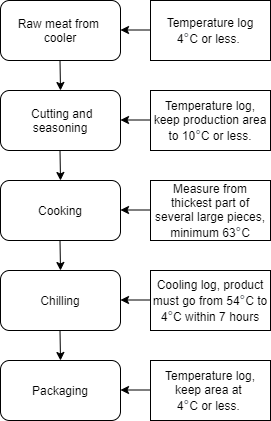

In [7]:
# Diagram 

Image(filename='diagram.png')

## <span style='color:steelblue'> Data processing </span>

Once the raw data is obtained, the .csv file can be **pre processed in SQL Server Integration Services (SSIS)** helping locate anomalies and insufficient data instances. This step can also be automated by creating templates (example shown below) if the data generated by a specific process always requires the same treatment before analysis.

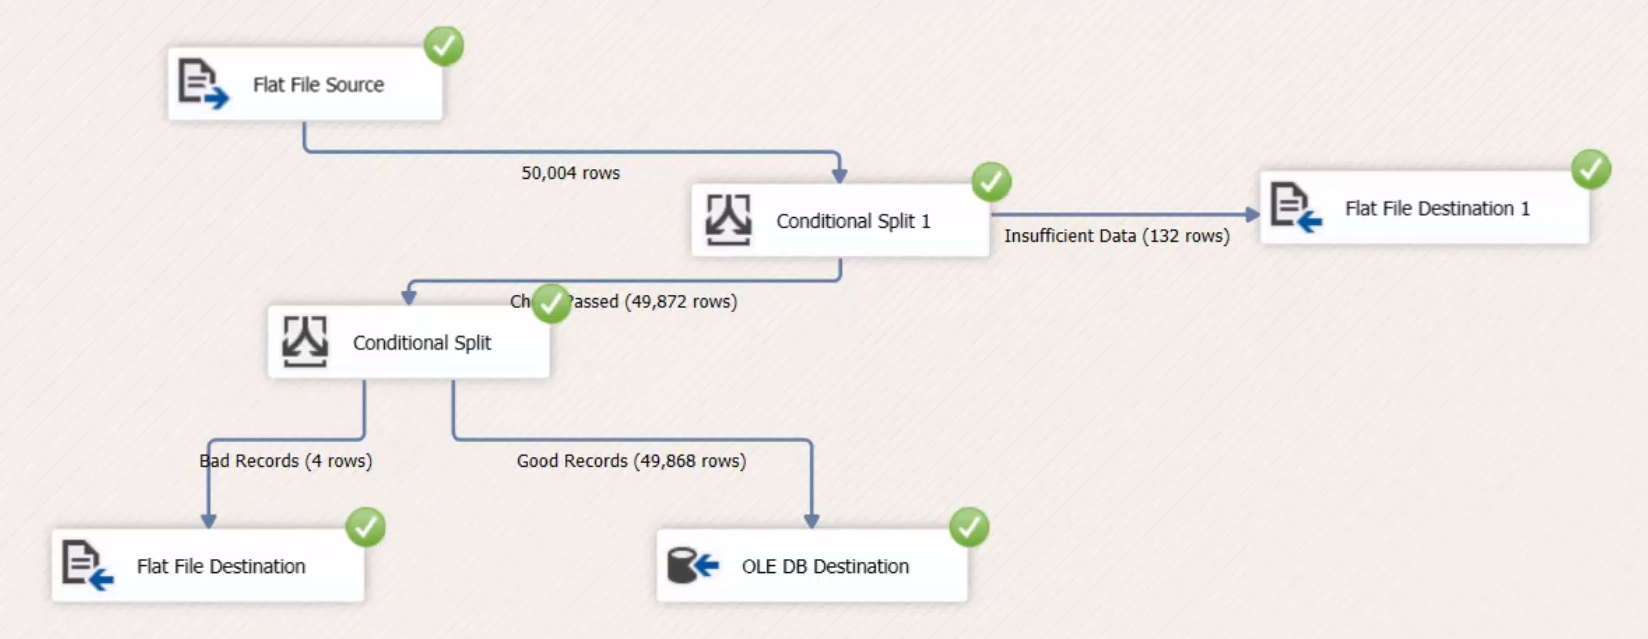

In [5]:
# SSIS fictional example

Image(filename='SSIS.png')

&nbsp;

The next step is to transform the RAW table into a WORKING table in **Microsoft SQL Server Management Studio**, also automated through a stored procedure.  

&nbsp;

Once the WORKING table is obtained, SQL is very useful for data cleaning and exploratory data analysis when dealing with such extensive data. 

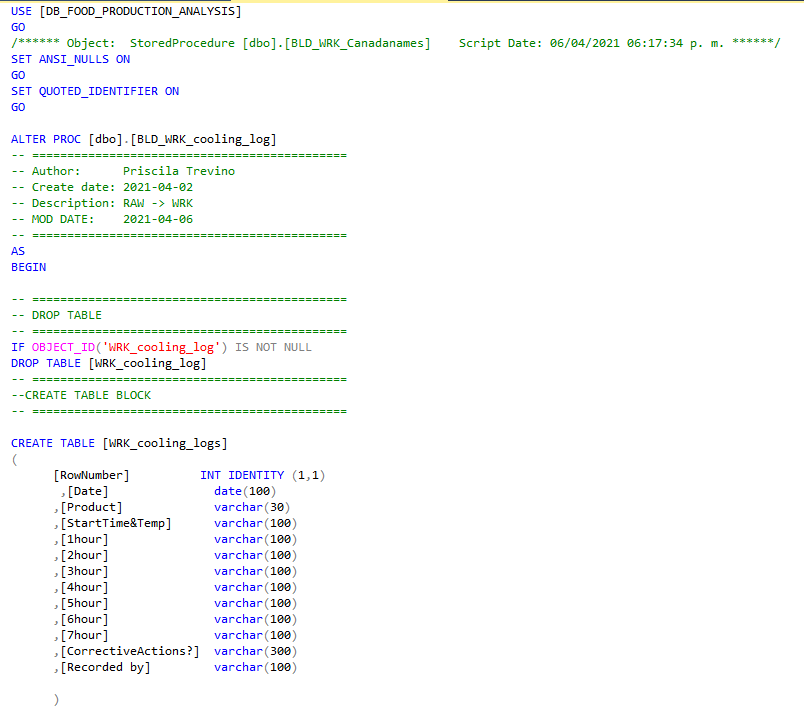

In [6]:
# SQL stored procedure fictional example

Image(filename='SQL.png')

## <span style='color:steelblue'> Data analysis </span>

However, for more specialized data analysis, the next step is to use a **programming language** to derive more insights from data by performing data exploration, visualization, modeling, statistical analysis, etc. 

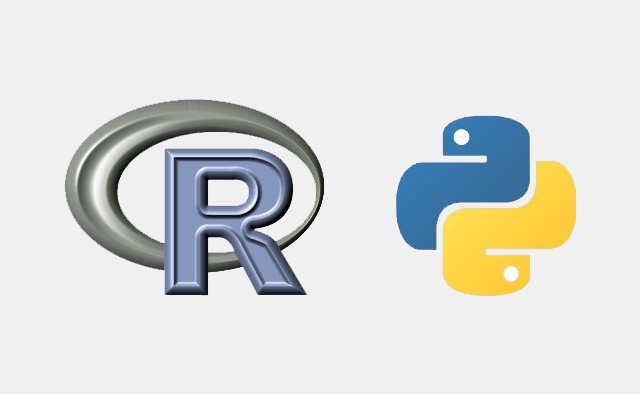

In [98]:
Image(filename='prog.png')

&nbsp;

The example below shows a plot generated with **fictional cooling logs data using Python**. In this case, the data corresponds to the 'Chilling' stage of the ready-to-eat meat product diagram shown previously.

In [101]:
food_temp = pd.read_csv("temps.csv")
food_temp.head()

,time,temp_a,temp_b,temp_c,temp_d
0,0,54,54,54,54
1,1,45,45,46,46
2,2,33,31,34,34
3,3,26,25,25,27
4,4,18,18,17,19


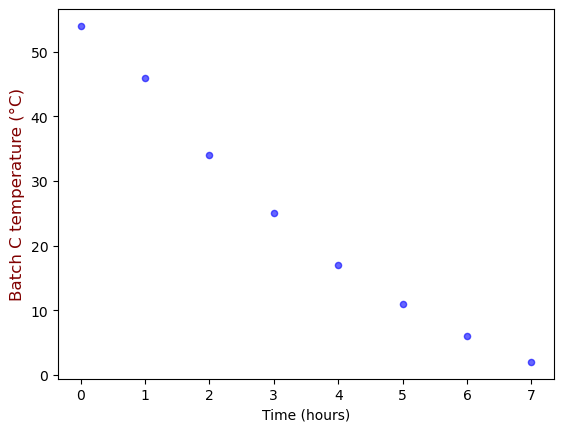

In [21]:
# Fictional Cooling Log plot

plt.style.use('default')
food_temp.plot(kind='scatter', x='time', y='temp_c', color='blue', alpha=0.6)

plt.xlabel('Time (hours)')
plt.ylabel('Batch C temperature (°C)', size=12, color='maroon')

plt.show()

&nbsp;

Python programming can also allow to **automate this step, as well as the generation of reports**.



As observed, this **framework** is highly effective to **optimize the food data analysis process**. It can also be implemented to analyze data related to **food research and development** experiments. 

The example below shows a **moisture content decline plot of the ready-to-eat meat product** using 3 different cooking methods: atmospheric cooking, pressure cooking and microwave cooking.
&nbsp;

Analysis allows to compare the 3 samples and determine the best processing methods for a specific product. 

In [104]:
moisture = pd.read_csv("water_content.csv")
print(moisture)

    time method  moisture_content
0      0    atm                74
1     10    atm                60
2     20    atm                58
3     30    atm                56
4     40    atm                55
5     50    atm                53
6      0  press                74
7     10  press                58
8     20  press                57
9     30  press                56
10    40  press                56
11    50  press                56
12     0     mw                74
13    10     mw                65
14    20     mw                61
15    30     mw                56
16    40     mw                53
17    50     mw                52


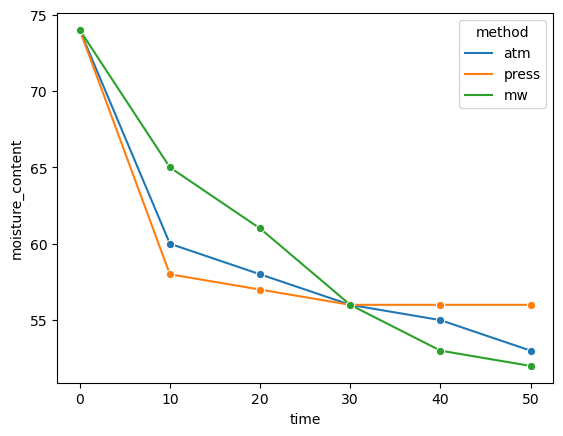

In [113]:
# Fictional moisture content 

sns.lineplot('time', 'moisture_content', data=moisture, hue='method', marker="o")

plt.show()

In [105]:
tbars = pd.read_csv("tbars.csv")
print(tbars)

    time method  tbars_value
0      0    atm          0.3
1     10    atm          0.3
2     20    atm          0.3
3     30    atm          0.3
4     40    atm          0.4
5     50    atm          0.4
6      0  press          0.3
7     10  press          1.2
8     20  press          1.2
9     30  press          1.4
10    40  press          1.5
11    50  press          1.5
12     0     mw          0.3
13    10     mw          3.9
14    20     mw          4.0
15    30     mw          4.0
16    40     mw          4.1
17    50     mw          4.1


## <span style='color:steelblue'> Statistical analysis </span>

A similar example is shown below. Thiobarbituric acid reactive substance (TBARS) assay is a method to detect lipid oxidation in food products. 

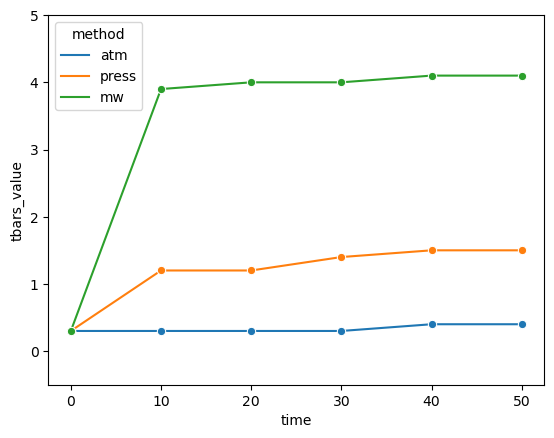

In [112]:
# Fictional TBARS plot

tbars_plot = sns.lineplot('time', 'tbars_value', data=tbars, hue='method', marker="o")
tbars_plot.set(ylim=(-0.5, 5))

plt.show()

&nbsp;

To determine if there is a **statistically significant difference** between samples, a pertinent **statistical test** is applied, which in this case is a **one-way ANOVA**. 

In [96]:
# Subsetting the TBARS values of each group

group1 = tbars.loc[(tbars['method'] == 'atm'), 'tbars_value']
group2 = tbars.loc[(tbars['method'] == 'press'), 'tbars_value']
group3 = tbars.loc[(tbars['method'] == 'mw'), 'tbars_value']

In [97]:
# Performing one-way ANOVA

f_oneway(group1, group2, group3)

F_onewayResult(statistic=17.90305515143499, pvalue=0.00010624655135609083)

&nbsp;

A **p-value < 0.05** was obtained, so the **null hypothesis is rejected**. This means that there is **sufficient evidence** to say that there is a difference in TBARS values among the three samples.